### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

### Define the class

In [12]:
class NeuralNetwork:

    def __init__(self, numInputs, numHiddenLayers, numNeuronsPerLayer, numOutputs, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        self.alpha = alpha
        self.numInputs = numInputs
        self.numHiddenLayers = numHiddenLayers
        self.numNeuronsPerLayer = numNeuronsPerLayer
        self.numOutputs = numOutputs
        
        self.weights = []
        self.biases = []
        
        for i in range(numHiddenLayers+1):
            if i == 0:
                self.weights.append(np.random.randn(numInputs, numNeuronsPerLayer))
            elif i < numHiddenLayers:
                self.weights.append(np.random.randn(numNeuronsPerLayer, numNeuronsPerLayer))
            else:
                self.weights.append(np.random.randn(numNeuronsPerLayer, numOutputs))
        
        for i in range(numHiddenLayers+1):
            if i >= 0:
                self.biases.append(numNeuronsPerLayer)
            else:
                self.biases.append(numOutputs)
        
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(X):  
        # applies the softmax function to a set of values
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        predictions = []
        level0 = self.sigmoid(np.dot(inputs, self.weights[0])+ self.biases[0])
        predictions.append(level0)
        
        # hidden layers
        for i in range(1, self.numHiddenLayers):
            level = self.sigmoid(np.dot(predictions[i-1], self.weights[i]) + self.biases[i])
            predictions.append(level)
        # last level
        if self.numOutputs == 1:
            last_level = self.sigmoid(np.dot(inputs, self.weights[-1])+ self.biases[-1])
            predictions.append(last_level)
        else:
            a = np.dot(predictions[-1], self.weights[-1]) + self.biases[-1]
            # Apply softmax
            expX = np.exp(a)
            res = expX / expX.sum(axis=1, keepdims=True)
            predictions.append(res)
        return predictions
        
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        errors = []
        
        for epoch in range(epochs):
            # Feed Forward
            predictions = self.predict(inputs)
            
            # Error
#             print('labels: ',labels.shape,'predictions',predictions[-1].shape)
            error = labels - predictions[-1]
            errors.append(np.mean(np.abs(error)))
            
            # print error after X steps
            if epoch%100 == 0:
                print("Error:", np.mean(np.abs(error)))
            
            # Backpropagation
            deltas = []
            bias_deltas = []
            
            delta = error * self.sigmoid_deriv(predictions[-1])
            bias_delta = np.sum(delta)
            
            deltas.append(delta)
            bias_deltas.append(bias_delta)
            
            for i in range(1,self.numHiddenLayers+1):
#                 print('delta: ',delta.shape,' self.weights: ', self.weights[-i].T.shape)
                level_error = np.dot(delta, self.weights[-i].T)
                delta = level_error * self.sigmoid_deriv(predictions[(i+1)*(-1)])
                bias_delta = np.sum(delta)
                deltas.append(delta)
                bias_deltas.append(bias_delta)
            
#             for i in deltas:
#                 print(delta shape: ', i.shape)

            for i in range(1,self.numHiddenLayers + 1):
#                 print('dot product of: ', predictions[(i+1)*(-1)].T.shape, ' and ', deltas[i-1].shape)
                self.weights[-i] += np.dot(predictions[(i+1)*(-1)].T, deltas[i-1]) * self.alpha
                self.biases[-i] += deltas[i-1] * self.alpha
            
            
            
                
            
        return errors

### Test datasets

#### XOR

In [13]:
np.random.seed(42)
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

2
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5
Error: 0.5


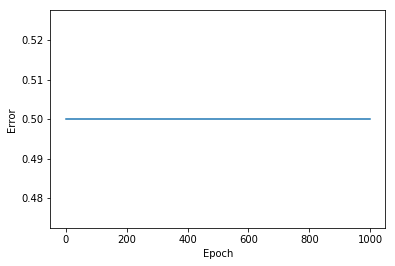

In [14]:
#TODO: Test the class with the XOR data
print(XOR_inputs.shape[1])
nn = NeuralNetwork(2,1,2,4,5)

errors = nn.train(XOR_inputs, XOR_labels)

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

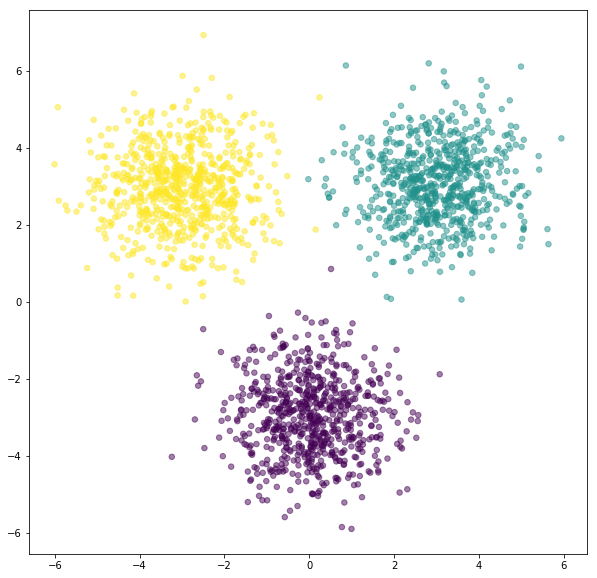

In [15]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

In [16]:
#TODO: Test the class with the multiple classes data
nn = NeuralNetwork(2,1,3,3,0.01)

errors = nn.train(feature_set, labels)

ValueError: operands could not be broadcast together with shapes (2100,) (2100,3) 

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

In [ ]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [ ]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [ ]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
nn = NeuralNetwork(784, 2, 32, 10, 0.001)

errors = nn.train(train_images[0:5000], train_labels[0:5000])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
2. **What could you try doing to improve the classification accuracy?**
